# Derived fields and values

**Authors**: Marijan Beg, Ryan A. Pepper, and Hans Fangohr

**Date**: 14 December 2016

In this tutorial, we show how derived fields and values can be computed afetr the micromagnetic system is defined.

## Simulation

First of all, as usual, we import `oommfc` and `discretisedfield`.

In [1]:
import oommfc as oc
import discretisedfield as df

We define the cube mesh with edge length $10 \,\text{nm}$ and cell discretisation edge $1 \,\text{nm}$.

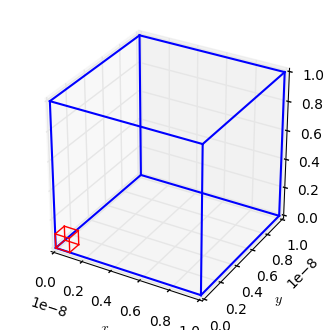

In [2]:
mesh = oc.Mesh(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9), cell=(1e-9, 1e-9, 1e-9))

# Plot the mesh.
%matplotlib inline
mesh

Now we define the system object and its Hamiltonian.

In [3]:
system = oc.System(name="system")

A = 1e-11
H = (0.1/oc.mu0, 0, 0)
K = 1e3
u = (1, 1, 1)
system.hamiltonian = oc.Exchange(A) + \
                     oc.Demag() + \
                     oc.Zeeman(H) + \
                     oc.UniaxialAnisotropy(K=K, u=u)

We will now intialise the system in $(0, 0, 1)$ direction and relax the magnetisation.

In [4]:
Ms = 8e5
system.m = df.Field(mesh, value=(0,0,1), norm=Ms)

Before we relax the magnetisation (calling OOMMF), we can compute the system's energy and plot its energy density.

The system's energy is 1.347079532198312e-19 J.


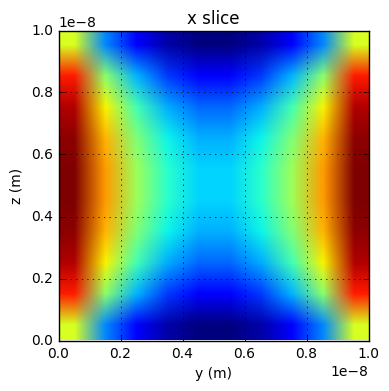

In [5]:
E = system.hamiltonian.energy
print("The system's energy is {} J.".format(E))

fig = system.hamiltonian.energy_density.plot_slice("x", 5e-9, xsize=4)

## Effective field

Total effective field is:

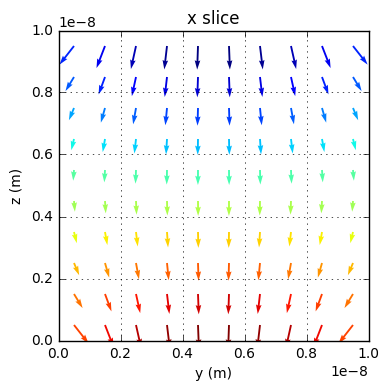

In [6]:
fig = system.hamiltonian.effective_field.plot_slice("x", 5e-9, xsize=4)

Whereas, the individual effective fields are:

In [7]:
Hex_eff = system.hamiltonian.exchange.effective_field

Because we initialised the system with the uniform state, we expect this effective field to be zero.

In [8]:
Hex_eff.average

(0.0, 0.0, 0.0)

## Relax the system

In [9]:
md = oc.MinDriver()
md.drive(system)

Compute the energy (and demonstrate that the energy decreased) and plot its magnetisation:

The system's energy is 5.352855331445394e-20 J.


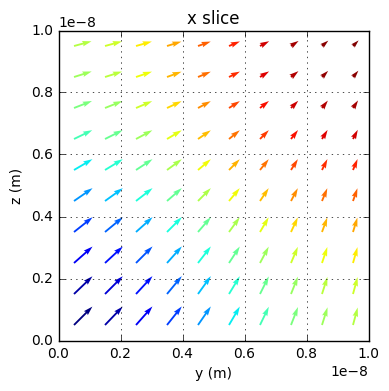

In [10]:
E = system.hamiltonian.energy
print("The system's energy is {} J.".format(E))

fig = system.m.plot_slice("x", 5e-9, xsize=4)

## Computing energies of individual term

For instance, the exchange energy is:

In [11]:
system.hamiltonian.exchange.energy

1.121701901803593e-21

We can also chack the sum of all individual energy terms and check if it the same as the total energy.

In [12]:
total_energy = 0
for term in system.hamiltonian.terms:
    total_energy += term.energy
    
print("The sum of energy terms is {} J.".format(total_energy))
print("The system's energy is {} J.".format(system.hamiltonian.energy))

The sum of energy terms is 5.352855331445394e-20 J.
The system's energy is 5.352855331445394e-20 J.


## Computing energy density

Similarly, the energy density of individual terms can be computed as:

In [13]:
Ez_density = system.hamiltonian.zeeman.energy_density

All operations that are allowed on scalar fields can be performed.

In [14]:
Ez_density.average

(-79972.352670843597,)

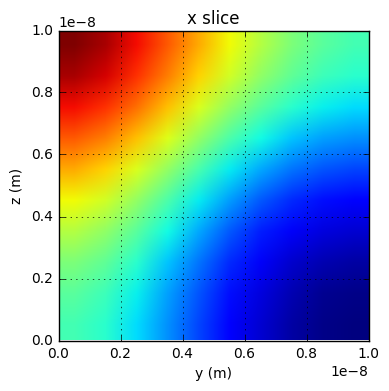

In [15]:
fig = Ez_density.plot_slice("x", 5e-9, xsize=4)